In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

READING THE DATA

In [2]:
df = pd.read_csv("C:/Users/Harshitha TS/OneDrive/Desktop/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
[feature for feature in df.columns if df[feature].dtypes != "object"]

['Rating']

In [6]:
df["Rating"].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [7]:
[feature for feature in df.columns if df[feature].dtypes == "object"]

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [8]:
df.describe() ## summary statistics

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


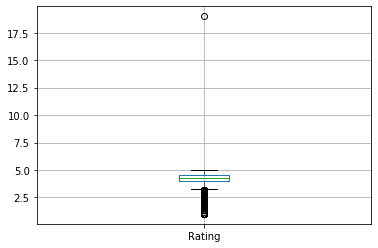

In [9]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B5FDFAFC8>]],
      dtype=object)

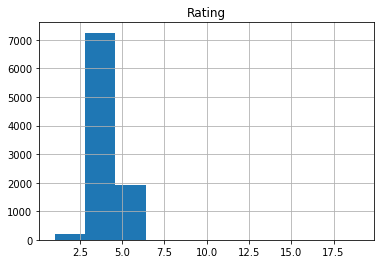

In [10]:
df.hist()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Data Cleaning
Finding out total number of missing values

In [12]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Checking for Outliers for ratings column.

In [13]:
max_threshold = df["Rating"].quantile(0.95) ## Threshold to detect outliers
print(max_threshold)

4.8


In [14]:
df[df["Rating"]> max_threshold] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,"1,000,000+",Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,"1,000+",Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24M,10+,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10801,Fr Ignacio Outreach,FAMILY,4.9,52,19M,"1,000+",Free,0,Everyone,Education,"January 19, 2018",1.0,4.4 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


In [15]:
min_threshold = df["Rating"].quantile(0.05)
print(min_threshold)

3.2


In [16]:
df[df["Rating"]< min_threshold]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
492,eharmony - Online Dating App,DATING,3.1,31320,53M,"5,000,000+",Free,0,Mature 17+,Dating,"July 30, 2018",6.6.5,4.1 and up
514,FarmersOnly Dating,DATING,3.0,1146,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
518,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10665,SB · FN 1870 Mobile Banking,FINANCE,2.9,139,3.3M,"10,000+",Free,0,Everyone,Finance,"June 19, 2017",3.0.5,4.0 and up
10677,Pint - FN Theme,PERSONALIZATION,2.5,6,234k,100+,Free,0,Everyone,Personalization,"August 10, 2013",1.0,2.2 and up
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10757,Fisher-Price® Smart Connect™,TOOLS,2.7,422,72M,"50,000+",Free,0,Everyone,Tools,"February 23, 2018",2.4.1,4.4 and up


In [17]:
df2 = df[(df["Rating"] < max_threshold) & (df["Rating"] > min_threshold)]

In [18]:
df2.shape

(8268, 13)

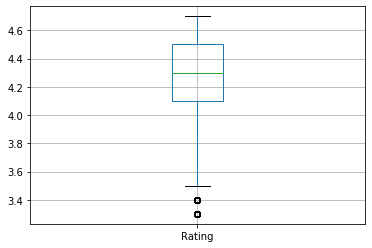

In [19]:
df2.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B60261208>]],
      dtype=object)

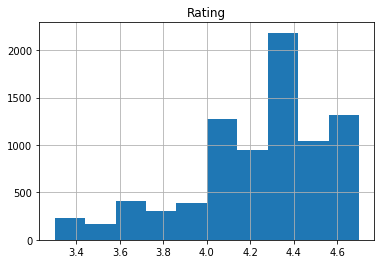

In [20]:
df2.hist()

Data manipulation

In [21]:
print(df2.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       3
Android Ver       2
dtype: int64


In [22]:
df2["Current Ver"].fillna(df2["Current Ver"].mode()[0],inplace = True)
df2["Android Ver"].fillna(df2["Android Ver"].mode()[0],inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
print(df2.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [24]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
df2["Price"].value_counts()

0         7730
$2.99      104
$0.99       82
$4.99       54
$3.99       50
          ... 
$1.50        1
$2.56        1
$3.88        1
$1.59        1
$15.46       1
Name: Price, Length: 68, dtype: int64

In [26]:
df2["Installs"].value_counts()

1,000,000+        1520
10,000,000+       1221
100,000+          1041
10,000+            870
5,000,000+         735
1,000+             506
500,000+           505
50,000+            410
100,000,000+       408
5,000+             349
50,000,000+        287
100+               130
500+               129
500,000,000+        72
1,000,000,000+      58
50+                 15
10+                 12
Name: Installs, dtype: int64

In [27]:
df2["Price"] = df2["Price"].str.replace("$","")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df2["Price"] = pd.to_numeric(df2["Price"],errors="coerce")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
df2["Installs"] = df2["Installs"].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df2["Installs"] = df2["Installs"].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df2["Installs"] = df2["Installs"].apply(lambda x: float(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [31]:
df2["Reviews"] = pd.to_numeric(df["Reviews"], errors= "coerce")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df2.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [33]:
df2.describe() ## Summary stats after cleaning

,Rating,Reviews,Installs,Price
count,8268.000000,8.268000e+03,8.268000e+03,8268.000000
mean,4.232160,5.790641e+05,2.019148e+07,0.989987
std,0.325565,3.340203e+06,9.686560e+07,16.294119
min,3.300000,1.000000e+00,1.000000e+01,0.000000
25%,4.100000,4.180000e+02,5.000000e+04,0.000000
50%,4.300000,1.043700e+04,1.000000e+06,0.000000
75%,4.500000,1.088772e+05,5.000000e+06,0.000000
max,4.700000,7.815831e+07,1.000000e+09,400.000000


In [34]:
df2.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Data Visualization

In [35]:
group = df2.groupby("Category")
x = group["Rating"].agg(np.mean)
y = group["Price"].agg(np.sum)
z = group["Reviews"].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.327273
AUTO_AND_VEHICLES      4.214035
BEAUTY                 4.279487
BOOKS_AND_REFERENCE    4.300000
BUSINESS               4.194215
COMICS                 4.204082
COMMUNICATION          4.184039
DATING                 4.063354
EDUCATION              4.376821
ENTERTAINMENT          4.140816
EVENTS                 4.321212
FAMILY                 4.216447
FINANCE                4.240502
FOOD_AND_DRINK         4.220000
GAME                   4.293934
HEALTH_AND_FITNESS     4.339056
HOUSE_AND_HOME         4.208108
LIBRARIES_AND_DEMO     4.185246
LIFESTYLE              4.165385
MAPS_AND_NAVIGATION    4.132143
MEDICAL                4.238745
NEWS_AND_MAGAZINES     4.189163
PARENTING              4.304762
PERSONALIZATION        4.316028
PHOTOGRAPHY            4.251546
PRODUCTIVITY           4.278797
SHOPPING               4.279111
SOCIAL                 4.240351
SPORTS                 4.239796
TOOLS                  4.161867
TRAVEL_AND_LOCAL       4.197030

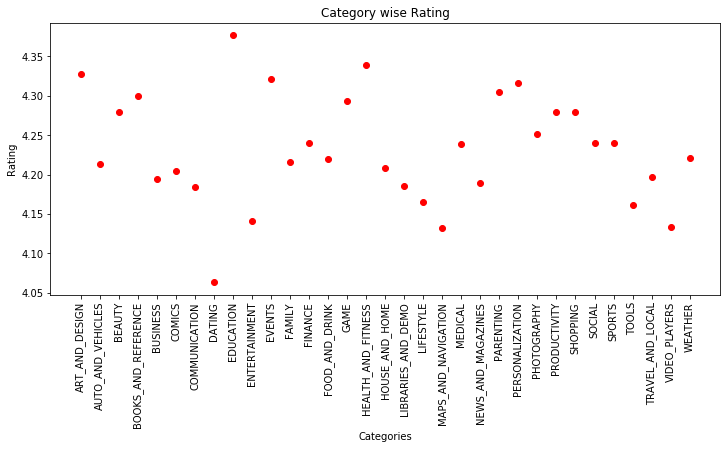

In [48]:
plt.figure(figsize=(12,5))
plt.plot(x , 'ro')
plt.xticks(rotation = 90)
plt.title("Category wise Rating")
plt.xlabel("Categories")
plt.ylabel("Rating")
plt.show()

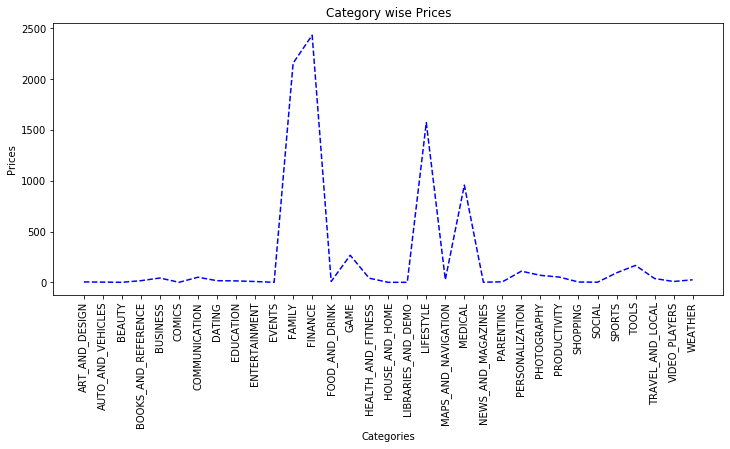

In [49]:
plt.figure(figsize=(12,5))
plt.plot(y ,'r--',color = "b")
plt.xticks(rotation = 90)
plt.title("Category wise Prices")
plt.xlabel("Categories")
plt.ylabel("Prices")
plt.show()

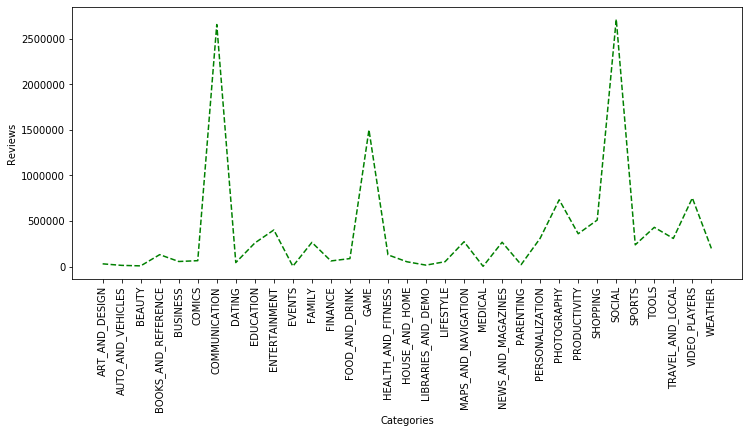

In [47]:
plt.figure(figsize=(12,5))
plt.plot(z ,'r--',color = "g")
plt.xticks(rotation = 90)
plt.title("Category wise Reviews")
plt.xlabel("Categories")
plt.ylabel("Reviews")
plt.show()